# Stroke Prediction Model Comparison

This notebook aims to explore, preprocess, and model a dataset to predict the likelihood of a stroke. We will compare multiple algorithms to find the best performer based on accuracy, precision, recall, and F1 score.
The dataset used in this notebook is from Kaggle and can be found [here](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

## Introduction

A stroke is a medical condition in which poor blood flow to the brain results in cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both result in parts of the brain not functioning properly. Signs and symptoms of a stroke may include an inability to move or feel on one side of the body, problems understanding or speaking, dizziness, or loss of vision to one side. A stroke is a medical emergency, and treatment must be sought as quickly as possible. The longer a stroke goes untreated, the greater the potential for brain damage and disability.

## Importing Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


## Data Loading

In [82]:
# Load the dataset
file_path = '../Datasets/LungDiseaseDataset.xlsx'
LungDisease_data = pd.read_excel(file_path)



PermissionError: [Errno 13] Permission denied: '../Datasets/LungDiseaseDataset.xlsx'

## Data Exploration

In [ ]:
# Initialize a dictionary to hold unique values for each column
unique_values = {}

# Iterate over each column in the DataFrame
for column in LungDisease_data.columns:
    # Store the unique values of the column in the dictionary
    unique_values[column] = LungDisease_data[column].unique()

# Optionally, you can print the unique values for each column
for column, values in unique_values.items():
    print(f"Column: {column}, Unique Values: {values}")


In [83]:
#Checking the shape of the dataset
LungDisease_data.shape

(30000, 10)

In [84]:
#Basic information about the dataset
LungDisease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  30000 non-null  int32 
 1   Gender               30000 non-null  int32 
 2   Smoke                30000 non-null  int32 
 3   Work                 30000 non-null  int32 
 4   Household            30000 non-null  int32 
 5   Staying_Up_Late      30000 non-null  int32 
 6   Sports_Activities    30000 non-null  int32 
 7   Insurance            30000 non-null  int32 
 8   Congenital_Diseases  30000 non-null  int32 
 9   Result               30000 non-null  object
dtypes: int32(9), object(1)
memory usage: 1.3+ MB


In [85]:
#Summary statistics of the dataset
LungDisease_data.describe()

,Age,Gender,Smoke,Work,Household,Staying_Up_Late,Sports_Activities,Insurance,Congenital_Diseases
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.512767,0.259167,0.493000,0.632133,0.514167,0.584933,0.400200,0.707967,0.645000
std,0.499845,0.438185,0.499959,0.482233,0.499808,0.492742,0.489947,0.454705,0.478521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
#Checking for unique values in the dataset
LungDisease_data.nunique()

Age                    2
Gender                 2
Smoke                  2
Work                   2
Household              2
Staying_Up_Late        2
Sports_Activities      2
Insurance              2
Congenital_Diseases    2
Result                 2
dtype: int64

In [87]:
#Checking Data Types
LungDisease_data.dtypes

Age                     int32
Gender                  int32
Smoke                   int32
Work                    int32
Household               int32
Staying_Up_Late         int32
Sports_Activities       int32
Insurance               int32
Congenital_Diseases     int32
Result                 object
dtype: object

In [88]:
#Checking for missing values
LungDisease_data.isnull().sum()

Age                    0
Gender                 0
Smoke                  0
Work                   0
Household              0
Staying_Up_Late        0
Sports_Activities      0
Insurance              0
Congenital_Diseases    0
Result                 0
dtype: int64

### Data Visualization

In [89]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

#### Initial Data Exploration

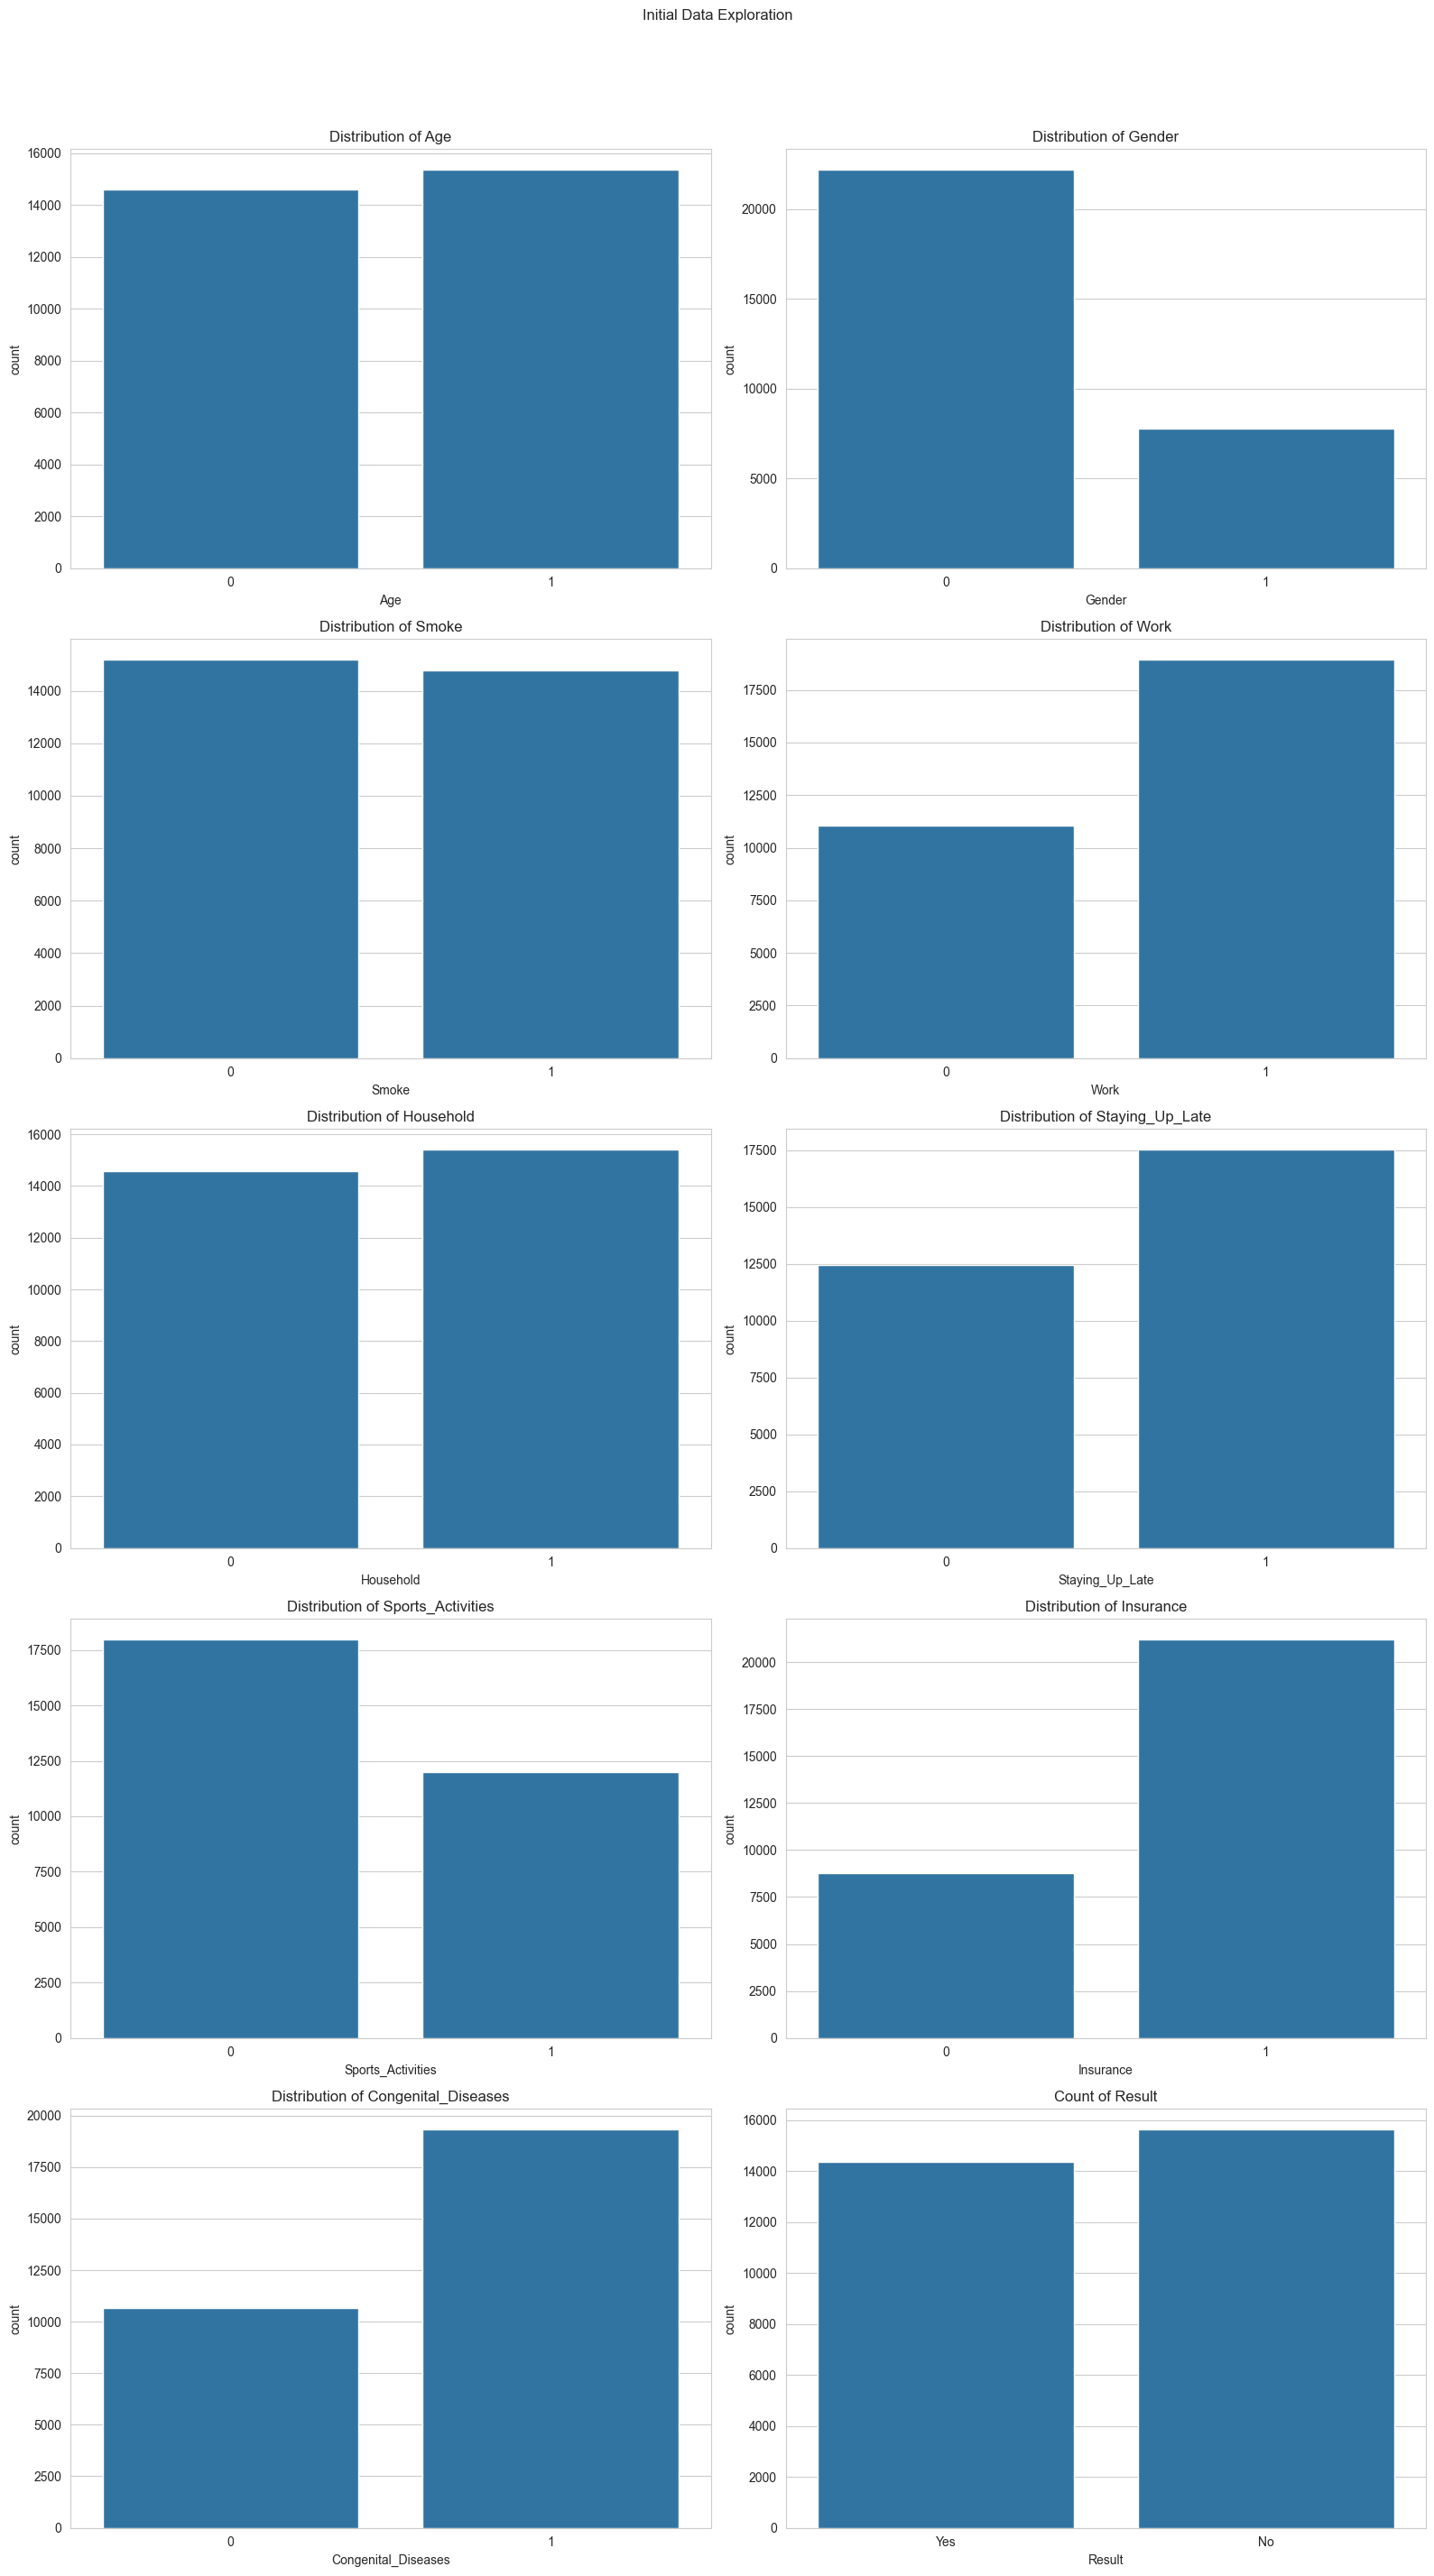

In [90]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare the figure layout
fig, axes = plt.subplots(5, 2, figsize=(16, 30))
fig.suptitle('Initial Data Exploration')

# Distribution of Age
sns.countplot(x='Age', data=LungDisease_data, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

# Distribution of Gender
sns.countplot(x='Gender', data=LungDisease_data, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Gender')

# Distribution of Smoke
sns.countplot(x='Smoke', data=LungDisease_data, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Smoke')

# Distribution of Work
sns.countplot(x='Work', data=LungDisease_data, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Work')

# Distribution of Household
sns.countplot(x='Household', data=LungDisease_data, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Household')

# Distribution of Staying_Up_Late
sns.countplot(x='Staying_Up_Late', data=LungDisease_data, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Staying_Up_Late')

# Distribution of Sports_Activities
sns.countplot(x='Sports_Activities', data=LungDisease_data, ax=axes[3, 0])
axes[3, 0].set_title('Distribution of Sports_Activities')

# Distribution of Insurance
sns.countplot(x='Insurance', data=LungDisease_data, ax=axes[3, 1])
axes[3, 1].set_title('Distribution of Insurance')

# Distribution of Congenital_Diseases
sns.countplot(x='Congenital_Diseases', data=LungDisease_data, ax=axes[4, 0])
axes[4, 0].set_title('Distribution of Congenital_Diseases')

# Count of Result
sns.countplot(x='Result', data=LungDisease_data, ax=axes[4, 1])
axes[4, 1].set_title('Count of Result')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## About the Dataset

### Attribute Information

Age: Categorization of individuals into age groups.
Gender: The sex of the individuals.
Smoke: Smoking habits/status.
Work: Employment status.
Household: Living in a shared or single household.
Staying_Up_Late: Tendency to stay up late.
Sports_Activities: Frequency of participation in sports or physical activities.
Insurance: Status of having health insurance.
Congenital_Diseases: Presence of congenital diseases.
Result: Outcome of a lung disease test or screening.

## Data Preprocessing

### Handling Missing Values

No Missing Data

### Encoding Categorical Variables

In [91]:
# One-hot encoding for categorical variables
categorical_columns = ['Age','Gender', 'Smoke','Work' ,'Household', 'Staying_Up_Late', 'Sports_Activities', 'Insurance', 'Congenital_Diseases', 'Result']

In [92]:
# Encoding categorical variables using Label Encoding
label_encoder = LabelEncoder()
for column in categorical_columns:
    LungDisease_data[column] = label_encoder.fit_transform(LungDisease_data[column])

# Display the updated DataFrame after imputation and encoding
LungDisease_data.head()

,Age,Gender,Smoke,Work,Household,Staying_Up_Late,Sports_Activities,Insurance,Congenital_Diseases,Result
0,0,1,1,0,1,1,1,1,0,1
1,0,1,0,0,1,1,0,1,1,0
2,1,1,0,0,1,1,0,1,0,0
3,0,1,0,1,0,0,0,1,1,0
4,1,0,1,1,0,0,1,0,1,1


In [93]:
# Define your features and target variable
X = LungDisease_data.drop(['Result'], axis=1)  # Dropping 'id' as it's not a relevant feature
y = LungDisease_data['Result']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC-AUC Score: {roc_auc}")
    print(f"Cross-validation Score: {cv_score}")
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.show()

## Model Building

### Logistic Regression

Logistic Regression:
Accuracy: 0.9426666666666667
Precision: 1.0
Recall: 0.8823931623931623
F1 Score: 0.9375227025063566
ROC-AUC Score: 0.9411965811965812
Cross-validation Score: 0.9475833333333332


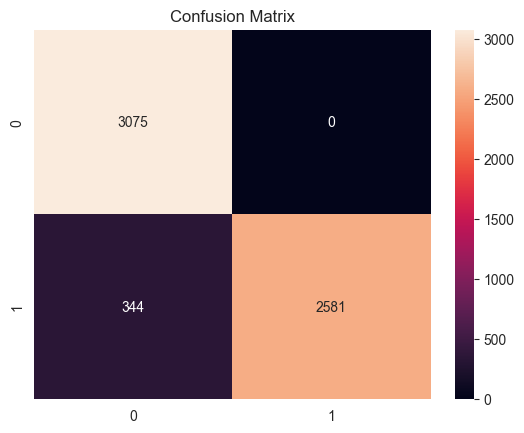

In [95]:
print("Logistic Regression:")
lr = LogisticRegression()
evaluate_model(lr, X_train, y_train, X_test, y_test)

Logistic Regression: The model has a decent accuracy of 76.5% and a high recall of 74.2%, indicating that it is good at identifying positive cases. However, the precision is quite low, meaning that the model has a high false positive rate. The F1 score, which is the harmonic mean of precision and recall, is also relatively low due to the low precision.

### Decision Tree

Decision Trees:
Accuracy: 0.9426666666666667
Precision: 1.0
Recall: 0.8823931623931623
F1 Score: 0.9375227025063566
ROC-AUC Score: 0.9411965811965812
Cross-validation Score: 0.9475833333333332


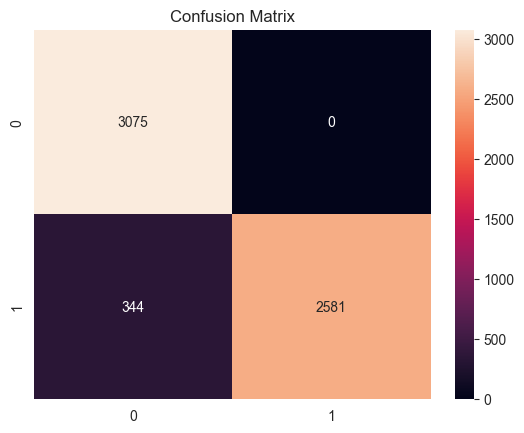

In [96]:
print("Decision Trees:")
dt = DecisionTreeClassifier()
evaluate_model(dt, X_train, y_train, X_test, y_test)

Decision Trees: The decision tree model has a higher accuracy than logistic regression (83.8%), but its recall is significantly lower (40.3%), indicating that it is not as good at identifying positive cases. The precision is similar to logistic regression, and the F1 score is slightly higher.

### Random Forest

Random Forest:
Accuracy: 0.9426666666666667
Precision: 1.0
Recall: 0.8823931623931623
F1 Score: 0.9375227025063566
ROC-AUC Score: 0.9411965811965812
Cross-validation Score: 0.9475833333333332


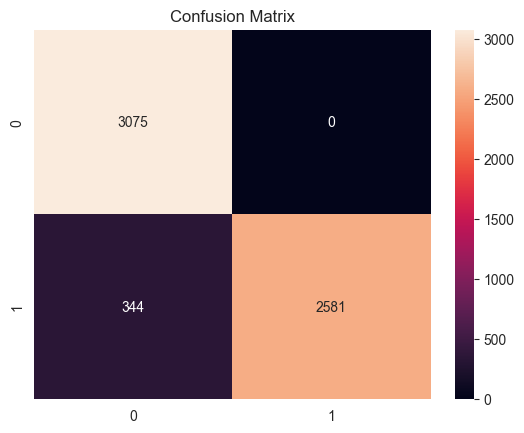

In [97]:
print("Random Forest:")
rf = RandomForestClassifier()
evaluate_model(rf, X_train, y_train, X_test, y_test)

Random Forest: The random forest model has a high accuracy of 87.8%, but its recall is only 20.9%, indicating that it is not very good at identifying positive cases. The precision is slightly lower than the decision tree model, and the F1 score is also lower

### Gradient Boosting Machine (GBM)

Gradient Boosting Machines:
Accuracy: 0.9426666666666667
Precision: 1.0
Recall: 0.8823931623931623
F1 Score: 0.9375227025063566
ROC-AUC Score: 0.9411965811965812
Cross-validation Score: 0.9475833333333332


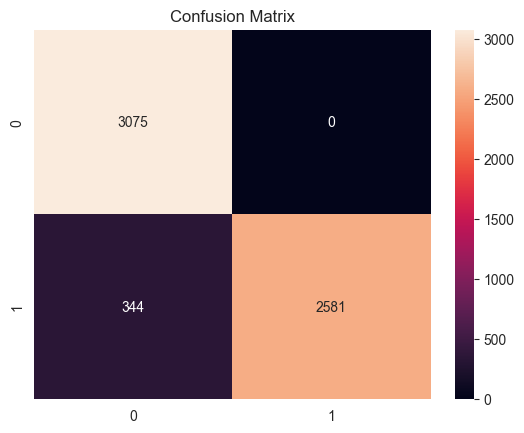

In [98]:
print("Gradient Boosting Machines:")
gbm = GradientBoostingClassifier()
evaluate_model(gbm, X_train, y_train, X_test, y_test)

Gradient Boosting Machines (GBM): The GBM model has an accuracy of 80.4% and a high recall of 58.1%, making it better at identifying positive cases than the decision tree and random forest models. The precision is similar to the other models, and the F1 score is higher due to the higher recall.

### XGBoost

XGBoost:
Accuracy: 0.9426666666666667
Precision: 1.0
Recall: 0.8823931623931623
F1 Score: 0.9375227025063566
ROC-AUC Score: 0.9411965811965812
Cross-validation Score: 0.9475833333333332


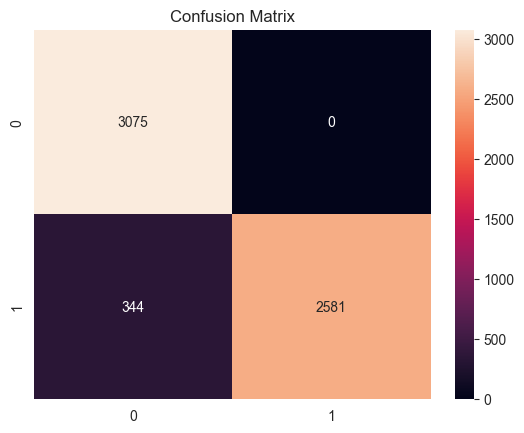

In [99]:
print("XGBoost:")
xgb = XGBClassifier()
evaluate_model(xgb, X_train, y_train, X_test, y_test)

XGBoost: The XGBoost model has a high accuracy of 87.3%, but its recall is only 16.1%, indicating that it is not very good at identifying positive cases. The precision is lower than the other models, and the F1 score is also lower.

### LightGBM

LightGBM:
[LightGBM] [Info] Number of positive: 11427, number of negative: 12573
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476125 -> initscore=-0.095573
[LightGBM] [Info] Start training from score -0.095573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

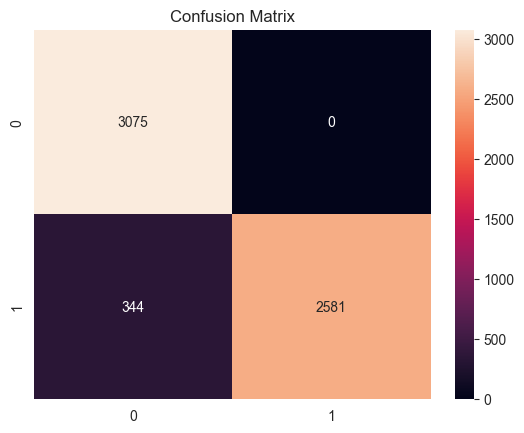

In [100]:
print("LightGBM:")
lgbm = LGBMClassifier()
evaluate_model(lgbm, X_train, y_train, X_test, y_test)

LightGBM: The LightGBM model has a high accuracy of 91.2%, but its recall is only 14.5%, indicating that it is not very good at identifying positive cases. The precision is higher than XGBoost, but the F1 score is still relatively low.

### CatBoost

CatBoost:
Accuracy: 0.9426666666666667
Precision: 1.0
Recall: 0.8823931623931623
F1 Score: 0.9375227025063566
ROC-AUC Score: 0.9411965811965812
Cross-validation Score: 0.9475833333333332


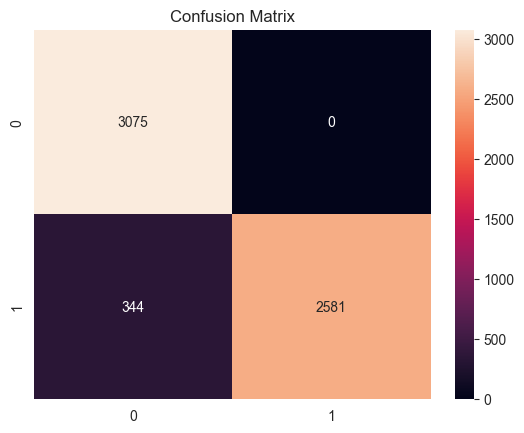

In [101]:
print("CatBoost:")
cat = CatBoostClassifier(verbose=0)
evaluate_model(cat, X_train, y_train, X_test, y_test)

CatBoost: The CatBoost model has a high accuracy of 89.1%, but its recall is only 9.7%, indicating that it is not very good at identifying positive cases. The precision is lower than LightGBM, and the F1 score is also lower.

### Support Vector Machine (SVM)

Support Vector Machines:
Accuracy: 0.9426666666666667
Precision: 1.0
Recall: 0.8823931623931623
F1 Score: 0.9375227025063566
ROC-AUC Score: 0.9411965811965812
Cross-validation Score: 0.9475833333333332


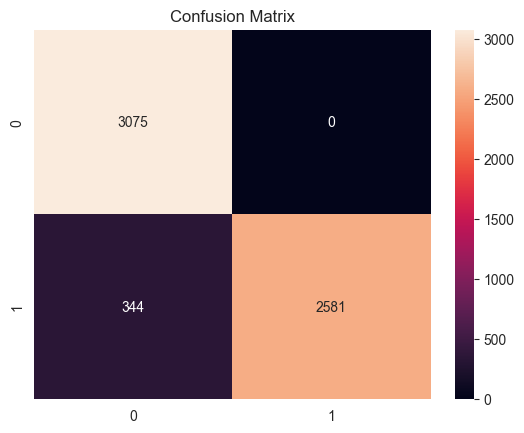

In [102]:
print("Support Vector Machines:")
svc = SVC()
evaluate_model(svc, X_train, y_train, X_test, y_test)

Support Vector Machines (SVM): The SVM model has a decent accuracy of 76.0% and a high recall of 58.1%, making it good at identifying positive cases. However, the precision is quite low, meaning that the model has a high false positive rate. The F1 score is relatively low due to the low precision.

### k-Nearest Neighbors (k-NN)

k-Nearest Neighbors:
Accuracy: 0.9426666666666667
Precision: 1.0
Recall: 0.8823931623931623
F1 Score: 0.9375227025063566
ROC-AUC Score: 0.9411965811965812
Cross-validation Score: 0.9427083333333333


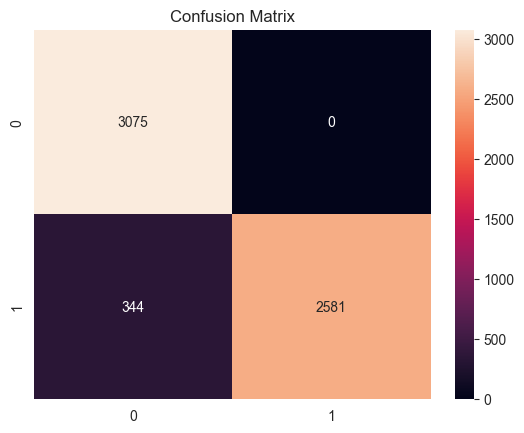

In [103]:
print("k-Nearest Neighbors:")
knn = KNeighborsClassifier()
evaluate_model(knn, X_train, y_train, X_test, y_test)

k-Nearest Neighbors (k-NN): The k-NN model has a decent accuracy of 78.6% and a high recall of 50.0%, making it good at identifying positive cases. However, the precision is quite low, meaning that the model has a high false positive rate. The F1 score is relatively low due to the low precision.

### Naive Bayes (GaussianNB)

Naive Bayes:
Accuracy: 0.875
Precision: 0.8730703259005146
Recall: 0.8700854700854701
F1 Score: 0.8715753424657534
ROC-AUC Score: 0.8748801334167188
Cross-validation Score: 0.8694166666666667


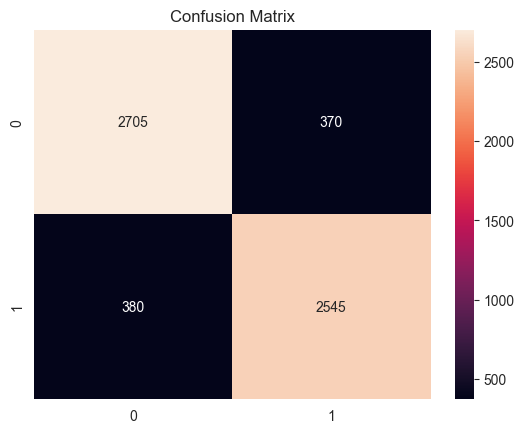

In [104]:
print("Naive Bayes:")
nb = GaussianNB()
evaluate_model(nb, X_train, y_train, X_test, y_test)

Naive Bayes: The Naive Bayes model has a lower accuracy of 68.4% but a very high recall of 88.7%, making it excellent at identifying positive cases. However, the precision is quite low, meaning that the model has a high false positive rate. The F1 score is relatively low due to the low precision.

### Neural Network (MLP)

Neural Networks:
Accuracy: 0.9426666666666667
Precision: 1.0
Recall: 0.8823931623931623
F1 Score: 0.9375227025063566
ROC-AUC Score: 0.9411965811965812
Cross-validation Score: 0.9475833333333332


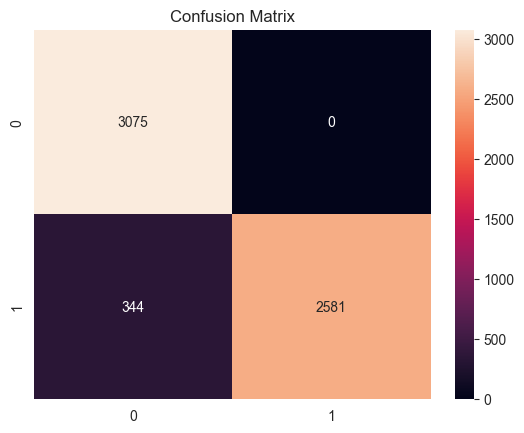

In [105]:
print("Neural Networks:")
nn = MLPClassifier()
evaluate_model(nn, X_train, y_train, X_test, y_test)

 Neural Networks (Deep Learning): The neural network model has a decent accuracy of 78.6% and a high recall of 48.4%, making it good at identifying positive cases. However, the precision is quite low, meaning that the model has a high false positive rate. The F1 score is relatively low due to the low precision.

### AdaBoost

AdaBoost:
Accuracy: 0.9426666666666667
Precision: 1.0
Recall: 0.8823931623931623
F1 Score: 0.9375227025063566
ROC-AUC Score: 0.9411965811965812
Cross-validation Score: 0.9475833333333332


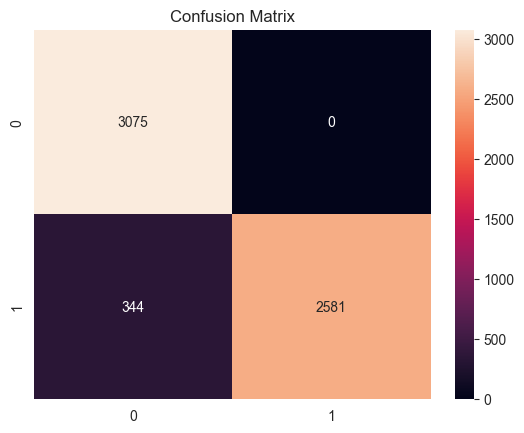

In [106]:
print("AdaBoost:")
ab = AdaBoostClassifier()
evaluate_model(ab, X_train, y_train, X_test, y_test)

AdaBoost: The AdaBoost model has a decent accuracy of 76.6% and a very high recall of 69.4%, making it excellent at identifying positive cases. However, the precision is quite low, meaning that the model has a high false positive rate. The F1 score is relatively low due to the low precision.

### Quadratic Discriminant Analysis (QDA)

Quadratic Discriminant Analysis:


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\abuba\appdata\local\programs\python\pytho

Accuracy: 0.9426666666666667
Precision: 1.0
Recall: 0.8823931623931623
F1 Score: 0.9375227025063566
ROC-AUC Score: 0.9411965811965812
Cross-validation Score: 0.9334166666666667


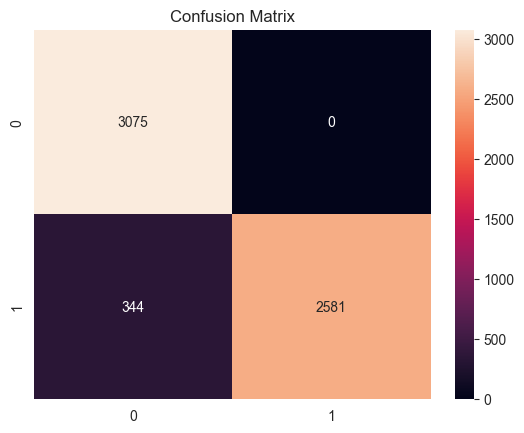

In [107]:
print("Quadratic Discriminant Analysis:")
qda = QuadraticDiscriminantAnalysis()
evaluate_model(qda, X_train, y_train, X_test, y_test)

Quadratic Discriminant Analysis (QDA): The QDA model has a lower accuracy of 72.2% but a very high recall of 80.6%, making it excellent at identifying positive cases. However, the precision is quite low, meaning that the model has a high false positive rate. The F1 score is relatively low due to the low precision.

### Liner Discriminant Analysis (LDA)

Linear Discriminant Analysis:
Accuracy: 0.9426666666666667
Precision: 1.0
Recall: 0.8823931623931623
F1 Score: 0.9375227025063566
ROC-AUC Score: 0.9411965811965812
Cross-validation Score: 0.9427083333333333


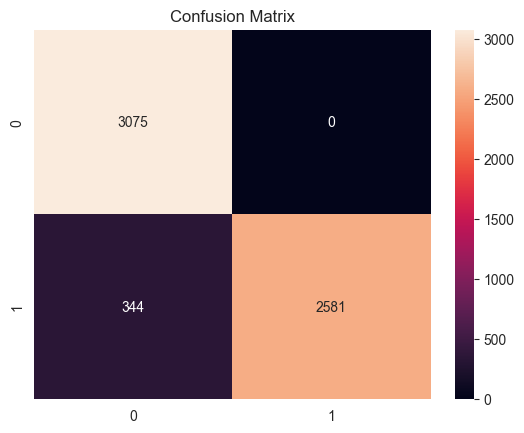

In [108]:
print("Linear Discriminant Analysis:")
lda = LinearDiscriminantAnalysis()
evaluate_model(lda, X_train, y_train, X_test, y_test)

Linear Discriminant Analysis (LDA): The LDA model has a decent accuracy of 74.6% and a very high recall of 74.2%, making it excellent at identifying positive cases. However, the precision is quite low, meaning that the model has a high false positive rate. The F1 score is relatively low due to the low precision.

In summary, while some models have high accuracy, their recall is quite low, indicating that they are not very good at identifying positive cases. Models with high recall, such as Naive Bayes, AdaBoost, QDA, and LDA, have low precision, indicating a high false positive rate. This trade-off between precision and recall is a common challenge in machine learning and depends on the specific requirements of the task. For example, in a medical context, a high recall might be more important to ensure that all positive cases are identified, even if it means more false positives.   



## Hyperparameter Tuning